### Analysing Boston Dataset

Solved by Grace

#### Housing Values in Suburbs of Boston

##### The medv variable is the target variable.

*Data description*

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

1. *crim* - per capita crime rate by town.
2. *zn* -proportion of residential land zoned for lots over 25,000 sq.ft.
3. *indus* - proportion of non-retail business acres per town.
4. *chas* -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. *nox* - nitrogen oxides concentration (parts per 10 million).
6. *rm* - average number of rooms per dwelling.
7. *age* - proportion of owner-occupied units built prior to 1940.
8. *dis* - weighted mean of distances to five Boston employment centres.
9. *rad* - index of accessibility to radial highways.
10. *tax* - full-value property-tax rate per 10,000USD.
11. *ptratio* - pupil-teacher ratio by town.
12. *black* - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. *lstat* - lower status of the population (percent).
14. *medv* - median value of owner-occupied homes in$1000s.

##### Source
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = pd.read_csv("Boston.csv")
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

### Exploratory Data analysis

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [4]:
boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
boston.tail()

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

      black  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

In [6]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

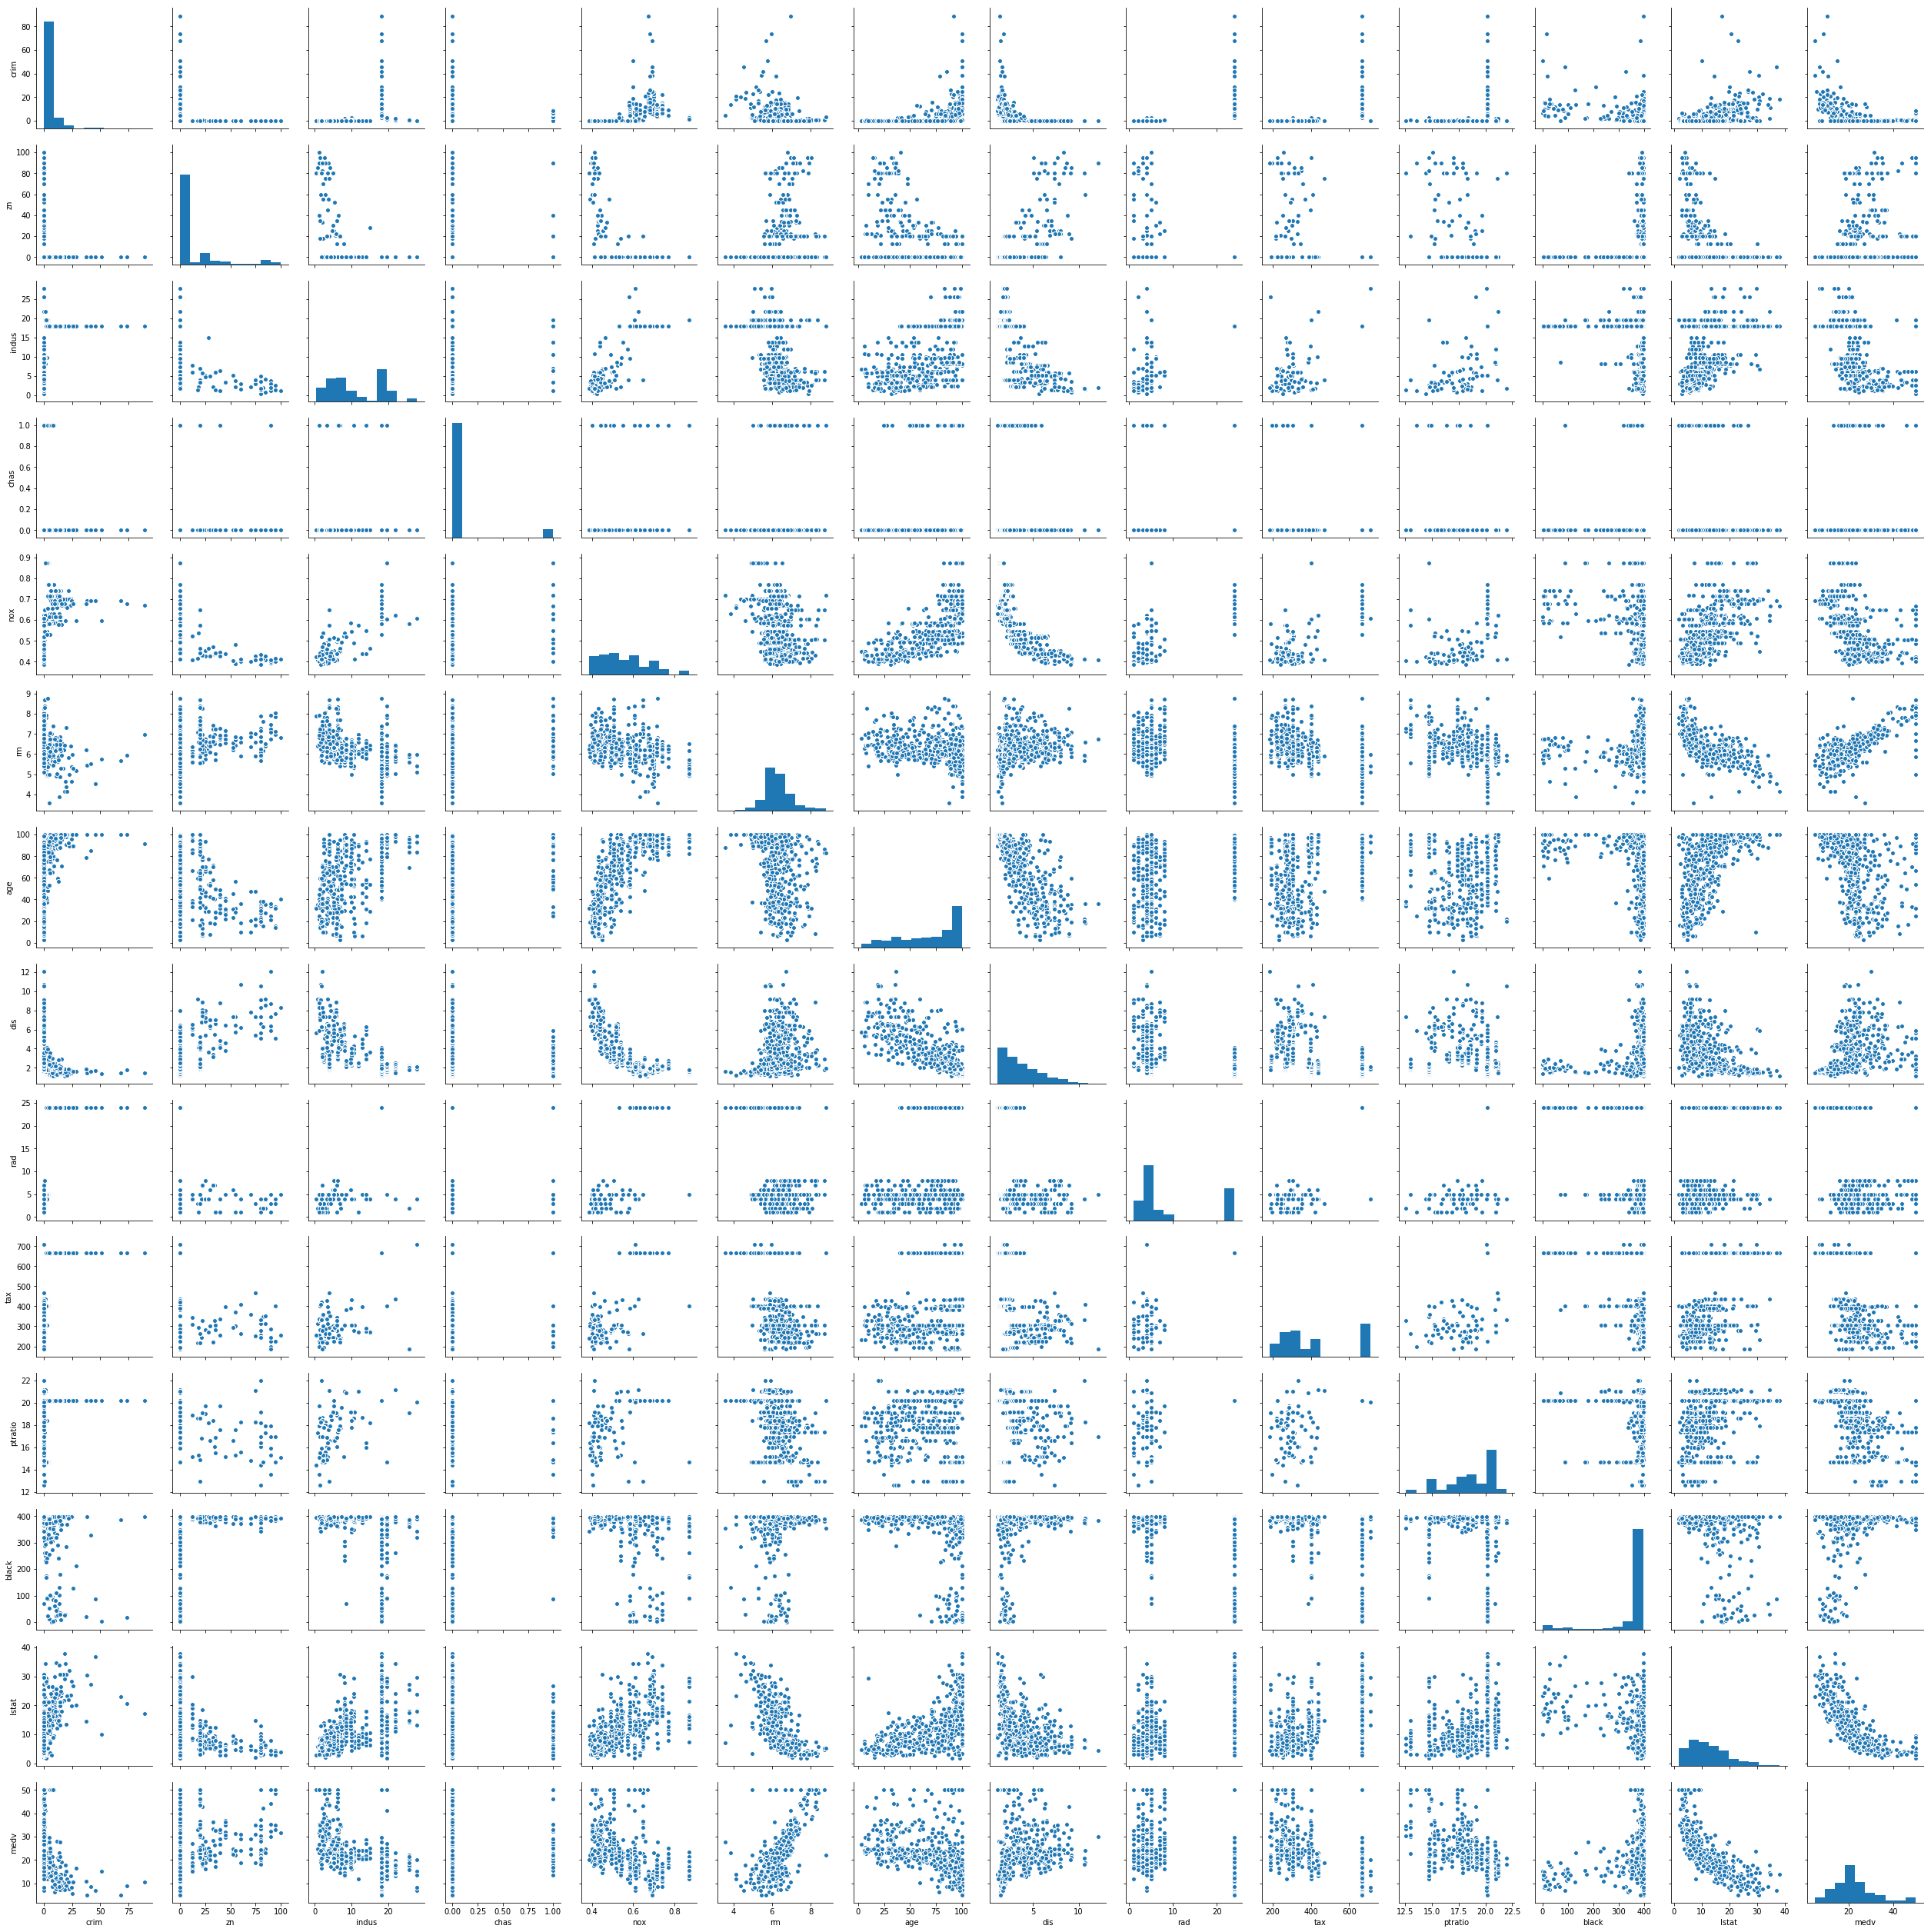

In [7]:
sns.pairplot(boston)

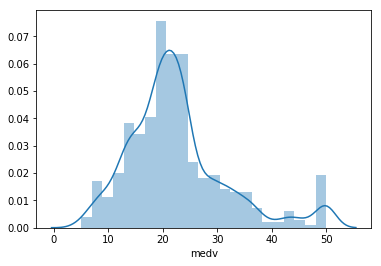

In [8]:
sns.distplot(boston["medv"])

In [9]:
bosCor = boston.corr()
bosCor

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     black     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
black    0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

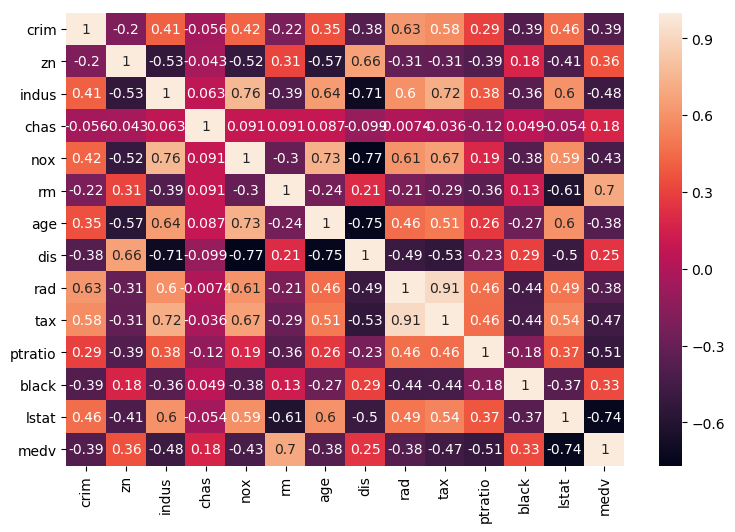

In [10]:
plt.figure(figsize=(9,6), dpi= 100)
sns.heatmap(bosCor, annot=True)

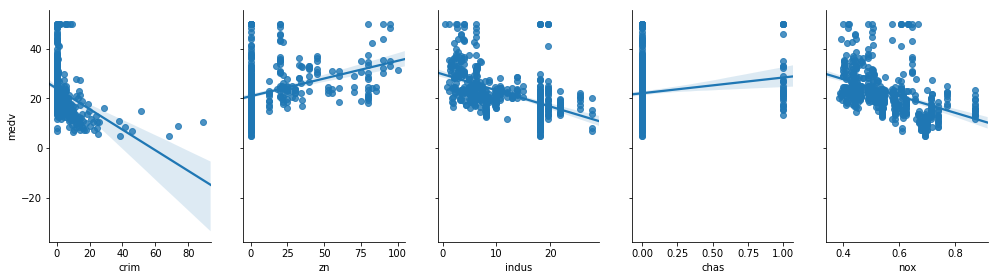

In [11]:
#Visualise the relationship between the features
data = boston
sns.pairplot(data, x_vars = ["crim", "zn", 'indus', 'chas', 'nox'], y_vars = ["medv"], size=4,aspect =0.7, kind= "reg")

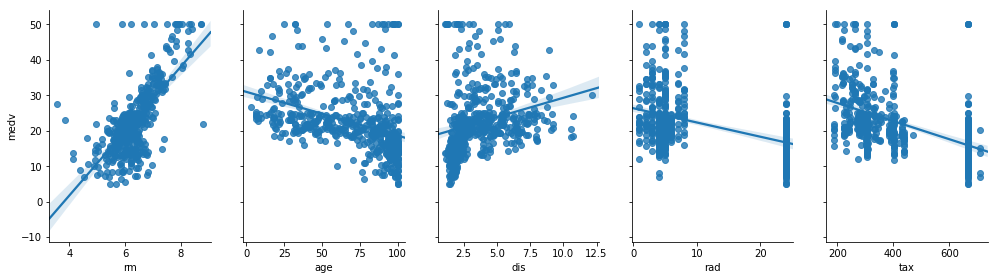

In [12]:
data = boston
sns.pairplot(data, x_vars = ["rm","age", "dis", 'rad','tax'], y_vars = ["medv"], size=4,aspect =0.7, kind= "reg")

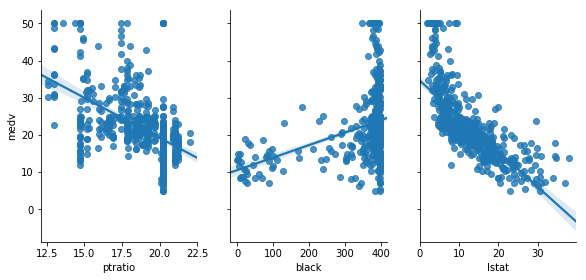

In [13]:
data = boston
sns.pairplot(data, x_vars = ["ptratio","black", "lstat"], y_vars = ["medv"], size=4,aspect =0.7, kind= "reg")

### Training my linear regression model

**Split our data into an x-array that contains the features to train on and y-array the target variable**

This involves spliting up my data into an X array that contains the features to train on, and a y array with the target variable, in this case the medv column. 

In [44]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [45]:
X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]

y= boston["medv"]

## Using Train Test Split

Now let's split the data into a training set and a testing set. I train out my model on the training set and then use the test set to evaluate the model

In [1]:
from sklearn.model_selection import train_test_split

In [47]:
#split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)


In [48]:
# print shapes of train and test 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### Creating and Training the model

In [49]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate Linear Regression
linreg = LinearRegression()

# fit the model to training data(Learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on testing set
y_pred = linreg.predict(X_test)

#compute the RMSE of our predictions
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.453237437198263

## Time for Model Evaluation

I now check out my model by going through the intercept and trying to interpret the coefficient

In [50]:
print(linreg.intercept_)

46.39649387182112


In [51]:
print(linreg.coef_)

[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [52]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [53]:
cdf = pd.DataFrame(linreg.coef_ , X.columns, columns= ['Coefficient'])
cdf

Coefficient
crim       -0.098542
zn          0.060784
indus       0.059172
chas        2.439560
nox       -21.469965
rm          2.795814
age         0.003575
dis        -1.516272
rad         0.307542
tax        -0.011280
ptratio    -1.005466
black       0.006450
lstat      -0.568835

### Predictions

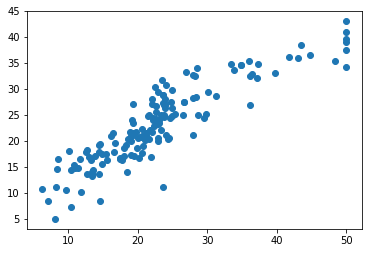

In [54]:
plt.scatter(y_test, y_pred)

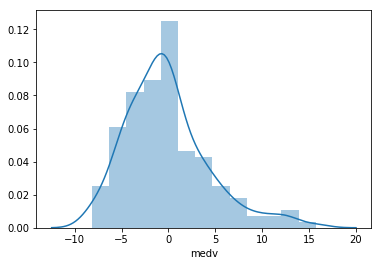

In [55]:
#A plot of the residuals, the residuals refer to the differenc between the test and predicted values

sns.distplot((y_test-y_pred))

In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.3446655035988626
MSE: 19.831323672064155
RMSE: 4.453237437198263


In [57]:
accuracy = linreg.score(X_test, y_test)
accuracy * 100

78.36295385076181

### RE-ENGINEERING THE FEATURES

In [58]:
X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','black']]
#removing 'lstat' and  'ptratio'

y= boston["medv"]

from sklearn.model_selection import train_test_split

#split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

# import model
from sklearn.linear_model import LinearRegression

#instantiate Linear Regression
linreg = LinearRegression()

# fit the model to training data(Learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on testing set
y_pred = linreg.predict(X_test)

#compute the RMSE of our predictions
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


4.943334908503752

In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.7350509852765854
MSE: 24.436560017631805
RMSE: 4.943334908503752


In [60]:
accuracy = linreg.score(X_test, y_test)
accuracy * 100

73.33839205221874

In [61]:
X = boston[['zn','indus','chas', 'dis', 'black', 'rm', 'age','rad',]]
#removing 'crim', ,'lstat' , 'nox', and  'ptratio'   'tax',

y= boston["medv"]

from sklearn.model_selection import train_test_split

#split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

# import model
from sklearn.linear_model import LinearRegression

#instantiate Linear Regression
linreg = LinearRegression()

# fit the model to training data(Learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on testing set
y_pred = linreg.predict(X_test)

#compute the RMSE of our predictions
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


5.234527759820461

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.9711806910708978
MSE: 27.40028086833101
RMSE: 5.234527759820461


In [63]:
accuracy = linreg.score(X_test, y_test)
accuracy * 100

72.33928619687539

### In conclusion, the first model is most suitable because it has an accuracy of 78.4%